## **Customer Churn Prediction: Model Comparison & Evaluation**
## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline as make_pipeline_imb

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (2).csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA (Exploratory Data Analysis)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#####  The dataset contains 7,043 entries. The "SeniorCitizen" feature is binary (0 or 1), "tenure" varies from 0 to 72 months, and "MonthlyCharges" ranges from 18.25 to 118.75, indicating diverse customer spending behavior.

### 1. Data Preprocessing

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [8]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

In [9]:
df.drop("customerID", axis=1, inplace=True)

#### Converting categorical values of Churn column to numerical values

In [10]:
df["Churn"] = df["Churn"].str.strip()  # Removes leading/trailing spaces
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [11]:
print(df["Churn"].unique())  # See what values exist in the column


[0 1]


In [12]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [14]:
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


### 2. Univariate Analysis

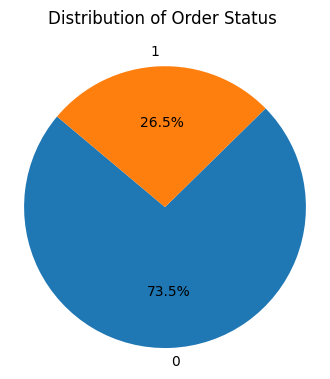

In [15]:
# Plot distribution for Churn column
plt.figure(figsize=(4,4))
output_counts = df['Churn'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Order Status \n')
plt.ylabel('')

plt.show()

##### Observation:The pie chart shows an imbalance in the Order Status distribution, with 73.5% in class 0 and 26.5% in class 1. This imbalance might impact model performance, requiring techniques like SMOTE or class weighting for better handling.

Box plot for numerical features:


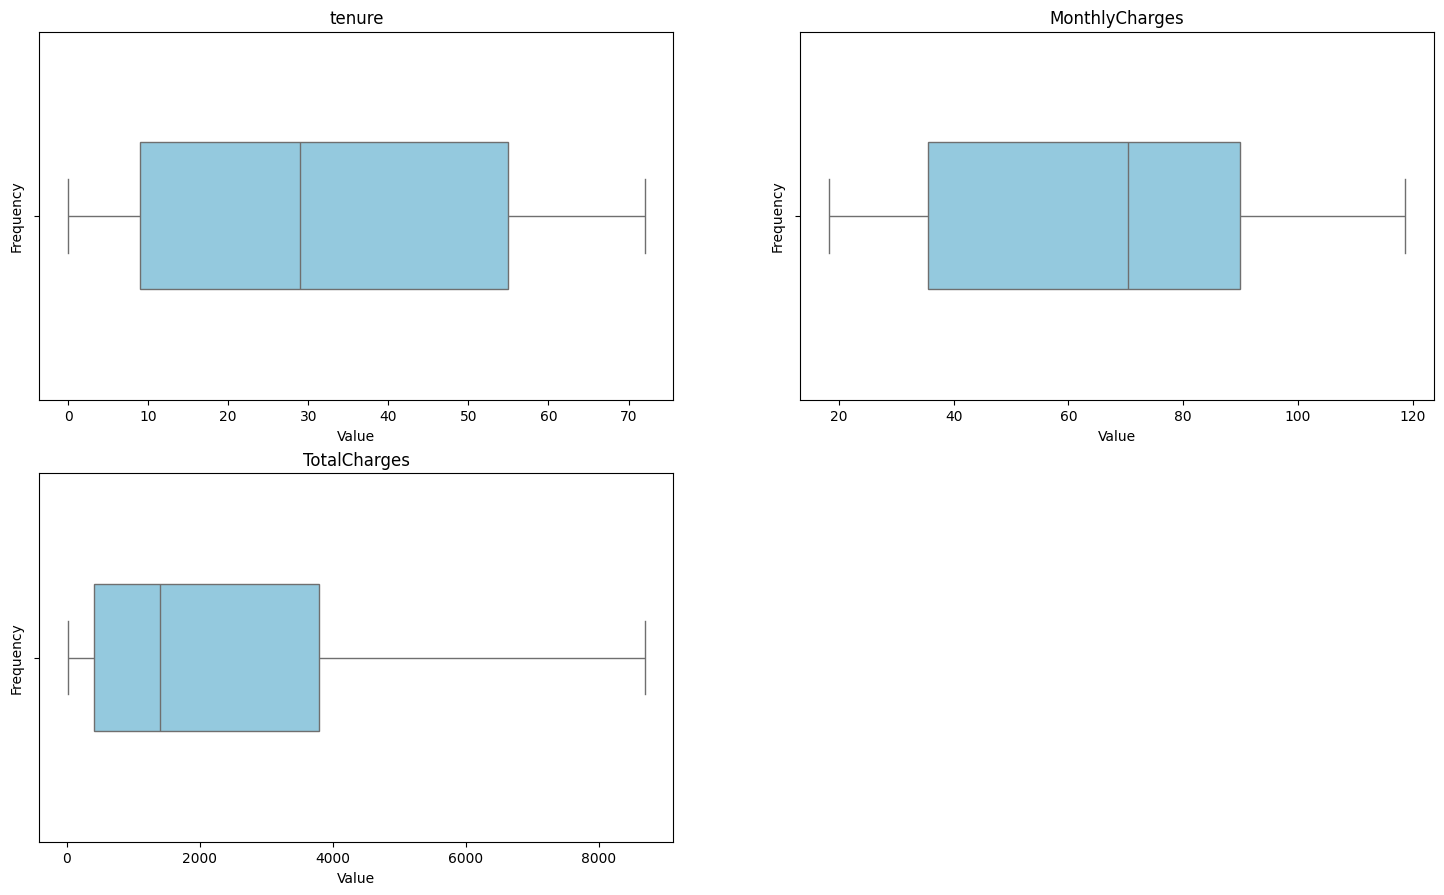

In [16]:
# Plot distribution of Numerical Features
print("Box plot for numerical features:")
plt.figure(figsize=(18,22))
numeric_features = ['tenure','MonthlyCharges', 'TotalCharges']
for i, column in enumerate(numeric_features):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x=df[column], color='skyBlue', width=0.4)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

##### Observation: The boxplots for tenure, MonthlyCharges, and TotalCharges show the distribution and spread of values. There are no significant outliers, but TotalCharges has a wider range, indicating high variance in customer billing.

Count plot for categorical features:


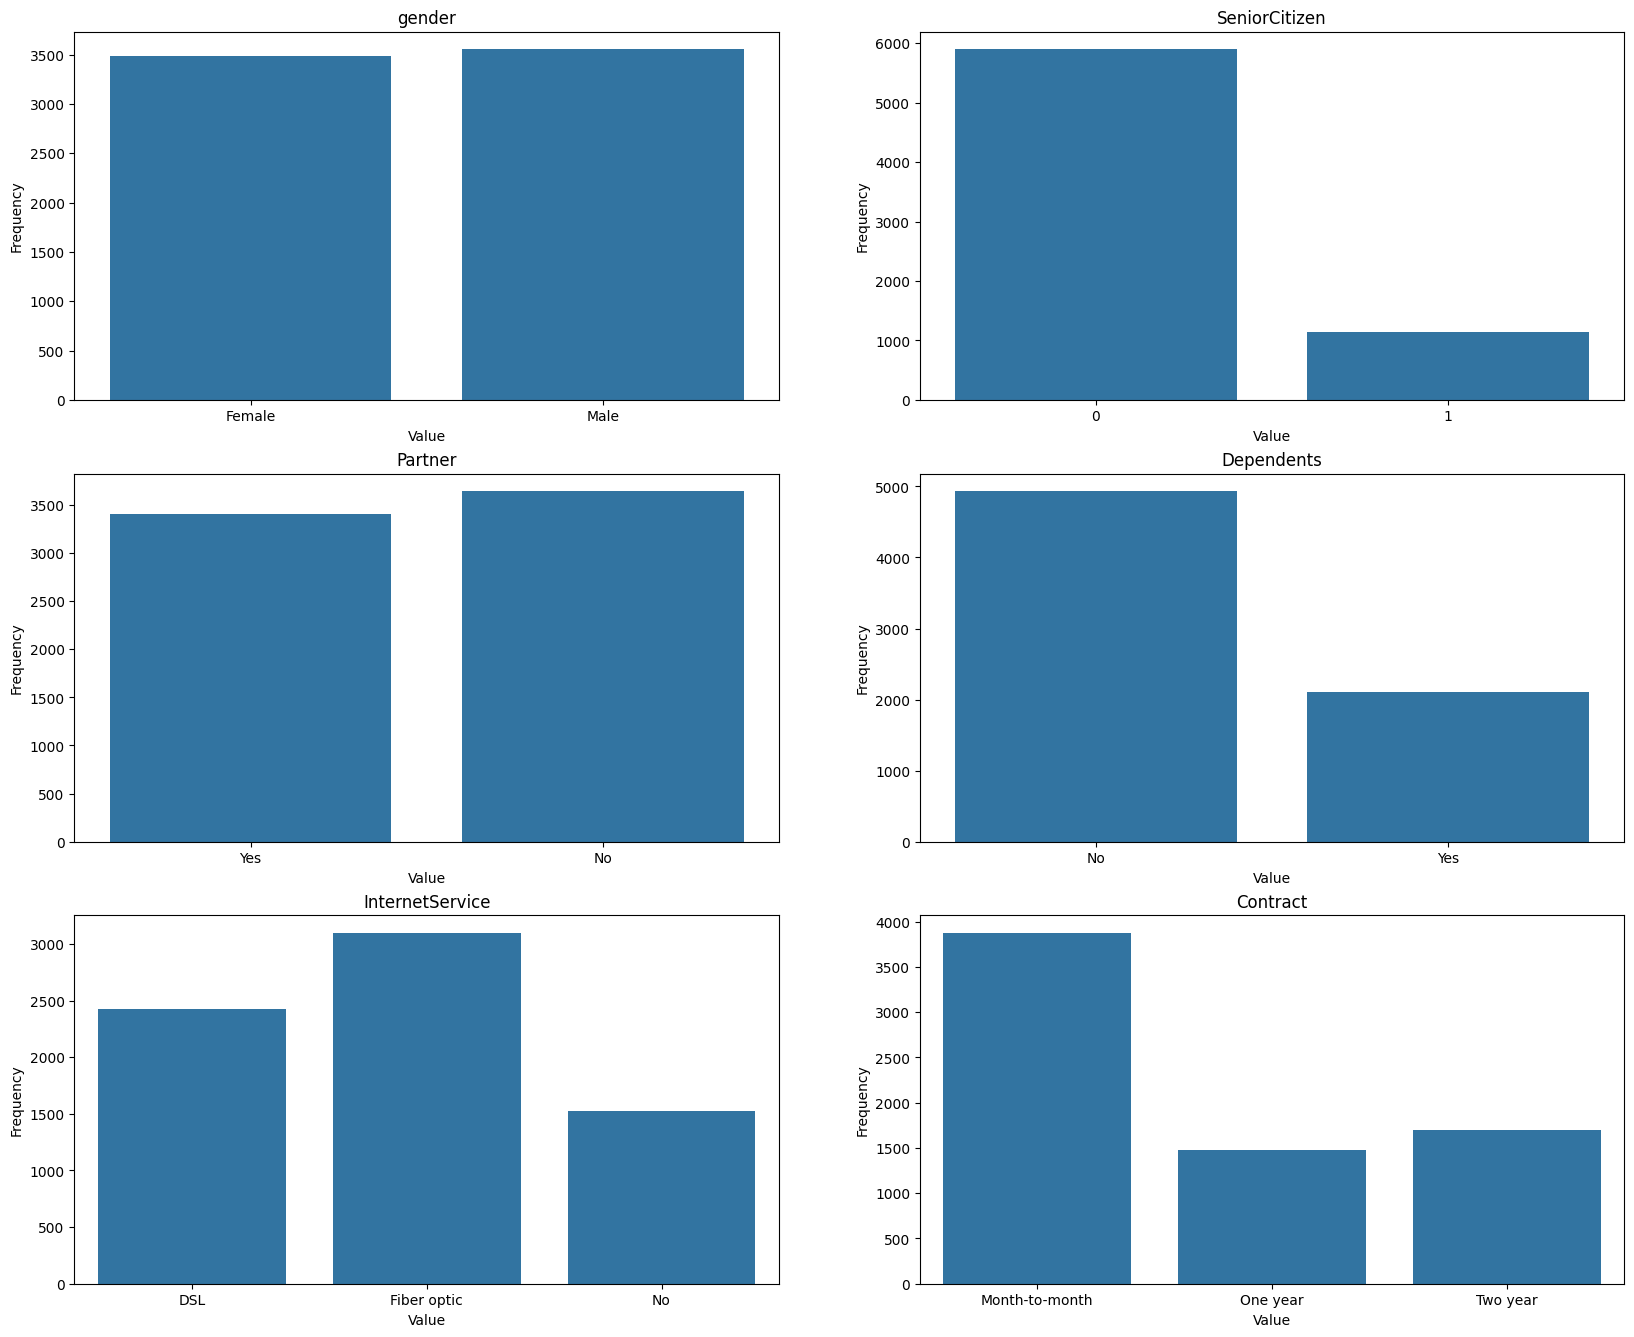

In [17]:
# Plot distribution for Categorical Features
print("Count plot for categorical features:")
plt.figure(figsize=(20,22))

for i, column in enumerate(["gender", "SeniorCitizen", "Partner", "Dependents", "InternetService", "Contract"]):
    plt.subplot(4,2,i + 1)
    sns.countplot(x= df[column], data=df)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

##### Observation: 1. Gender: The distribution of male and female customers is nearly equal.
##### 2. SeniorCitizen: A significantly smaller proportion of customers are senior citizens.
##### 3. Partner: Customers are almost evenly split between those with and without a partner.
##### 4. Dependents: Most customers do not have dependents.
##### 5. InternetService: Fiber optic is the most popular internet service, followed by DSL, with a smaller portion having no internet service.
##### 6. Contract: Most customers prefer a month-to-month contract over long-term commitments.

### 3. Bivariate Analysis

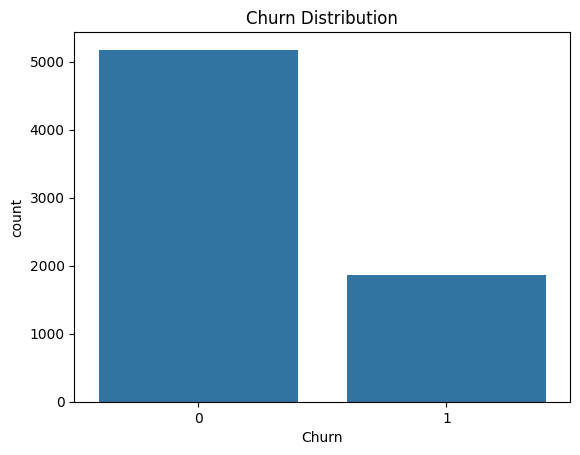

In [18]:
# Count of churned vs non-churned customers
sns.countplot(x=df["Churn"])
plt.title("Churn Distribution")
plt.show()

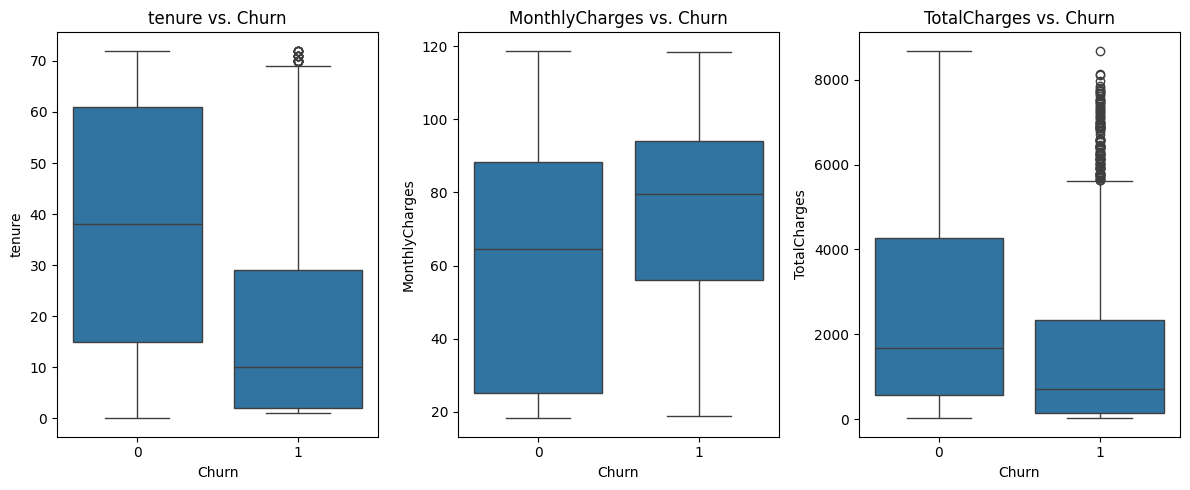

In [19]:
# Boxplots for numerical features vs. Churn
plt.figure(figsize=(12, 5))
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df["Churn"], y=df[col])
    plt.title(f"{col} vs. Churn")
plt.tight_layout()
plt.show()

##### Observation: 1. Tenure vs. Churn: Customers who churn tend to have significantly lower tenure, indicating that new customers are more likely to leave.
##### 2. MonthlyCharges vs. Churn: Customers with higher monthly charges have a higher likelihood of churning.
##### 3. TotalCharges vs. Churn: Customers who churn generally have lower total charges, suggesting that long-term customers are less likely to chur

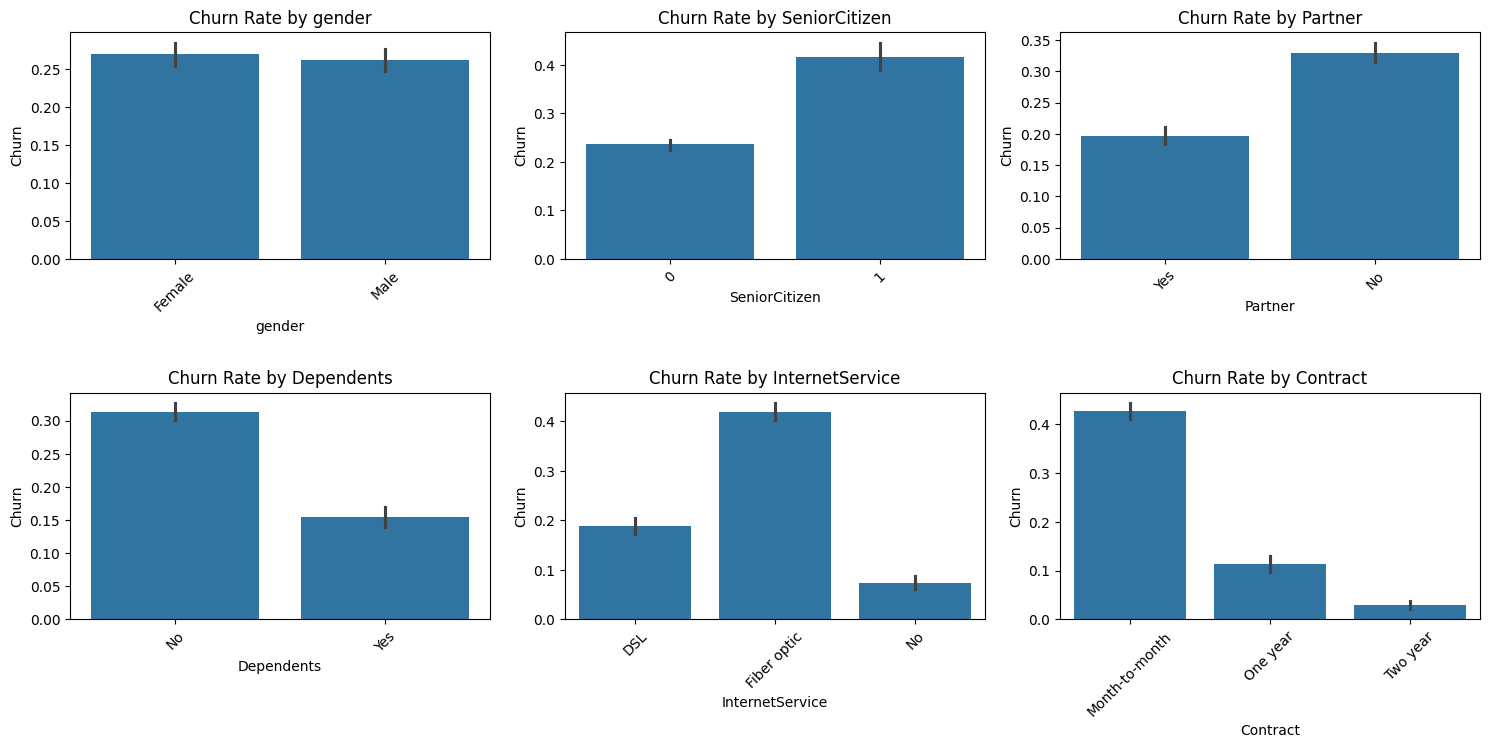

In [20]:
# Churn rate across categorical features
plt.figure(figsize=(15, 10))
categorical_cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "InternetService", "Contract"]

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.barplot(x=df[col], y=df["Churn"])
    plt.title(f"Churn Rate by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Observation: 1. Churn Rate by Gender: The churn rate for both males and females is around 27%, showing no significant difference based on gender.
##### 2. Churn Rate by Senior Citizen: Senior citizens churn at a much higher rate (~42%) compared to non-senior customers ~22%.
##### 3. Churn Rate by Partner: Customers without a partner have a churn rate of ~34%, whereas those with a partner churn at only ~19%.
##### 4. Churn Rate by Dependents: Customers without dependents have a churn rate of (~31%), while those with dependents churn at a lower rate of ~15%
##### 5. Churn Rate by Internet Service: Fiber optic users have the highest churn rate (~41%), while DSL users churn at ~20%, and customers with no internet churn the least ~8%.
##### 6. Churn Rate by Contract: Month-to-month contract customers churn at a high rate of ~43%, whereas one-year and two-year contract customers churn at ~12% and ~3%, respectively.

### 4. Correlation Analysis

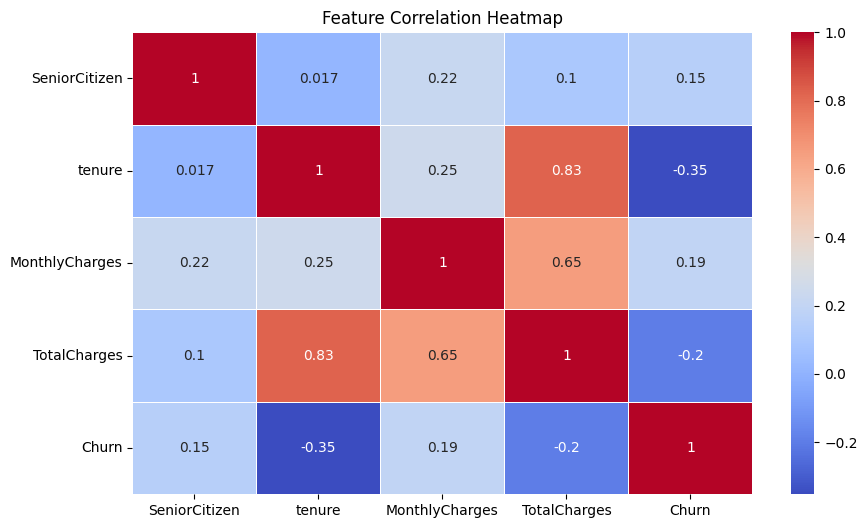

In [21]:
# Compute correlation matrix
plt.figure(figsize=(10, 6))
numerical_df = df.select_dtypes(include=["int64", "float64"])

sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

##### Observation: 1. Tenure vs. Churn (-0.35): Longer tenure reduces churn risk.
##### 2. TotalCharges vs. Tenure: A strong positive correlation (0.83) suggests that customers who have been with the company longer tend to accumulate higher total charges.
##### 3. MonthlyCharges vs. Churn: A weak positive correlation (0.19) suggests that higher monthly charges may slightly increase the likelihood of churn.
##### 4. TotalCharges vs. Churn: A negative correlation (-0.2) implies that customers with higher total charges are slightly less likely to churn, possibly because they have been with the company longer.
##### 5. SeniorCitizen vs. Churn: A weak positive correlation (0.15) suggests that senior citizens may be slightly more likely to churn, but the effect is not strong.
##### 6. MonthlyCharges vs. TotalCharges: A moderate positive correlation (0.65) indicates that customers with higher monthly charges also tend to have higher total charges, which makes sense as total charges accumulate over time.

### 5. Class Imbalance Check

Class distribution:
 Churn
0    5174
1    1869
Name: count, dtype: int64


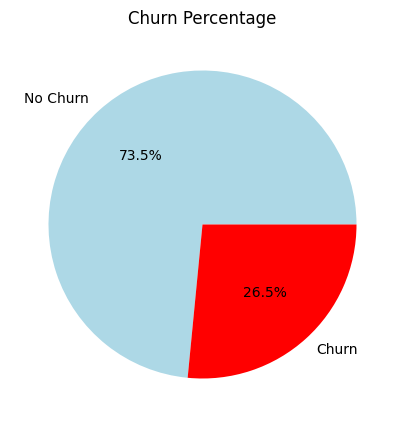

In [22]:
# Check class distribution
churn_counts = df["Churn"].value_counts()
print("Class distribution:\n", churn_counts)

# Pie chart for churn distribution
plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=["No Churn", "Churn"], autopct="%1.1f%%", colors=["lightblue", "red"])
plt.title("Churn Percentage")
plt.show()


##### Observation: The majority of customers are retained, but churn is still significant.

## Feature Engineering

### 1. Creating New Features

##### Converting tenure to years, calculated total service charges, and created a combined "FamilyStatus" feature to capture relationship dependencies.

In [23]:
# Create new features
df["TenureYears"] = df["tenure"] / 12  # Convert tenure from months to years
df["TotalServiceCharges"] = df["tenure"] * df["MonthlyCharges"]  # Total amount paid
df["FamilyStatus"] = df["Partner"] + "_" + df["Dependents"]  # Combine partner & dependent


In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureYears,TotalServiceCharges,FamilyStatus
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.083333,29.85,Yes_No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,0,2.833333,1936.30,No_No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0.166667,107.70,No_No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3.750000,1903.50,No_No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.166667,141.40,No_No


### 2. Encoding Categorical Varaibles
##### **Label Encoding:** Converted binary categorical columns (e.g., gender, Churn) into numerical format (0/1).
##### **Data Cleaning:** Replaced "No internet service" and "No phone service" with "None" for consistency.
##### **One-Hot Encoding:** Applied to multi-category columns to convert them into numerical dummy variables.
##### **Final Step:** Ensured all dataset values are numeric for ML model compatibility.

In [25]:
from sklearn.preprocessing import LabelEncoder

#Identify categorical columns
binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
multi_category_cols = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", 
                       "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", 
                       "Contract", "PaymentMethod"]

#Label Encoding for Binary Categorical Columns
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])  # Convert "Yes"/"No" & "Male"/"Female" to 1/0

# Handle "No internet service" & "No phone service" issues
for col in multi_category_cols:
    df[col] = df[col].replace({"No internet service": "None", "No phone service": "None"})  # Use a unique category

# Apply One-Hot Encoding for Multi-Category Columns
df = pd.get_dummies(df, columns=multi_category_cols, drop_first=True)

#Ensure dataset has only numerical values
df = df.apply(pd.to_numeric, errors='coerce')

#Printing the dataset
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_None,StreamingTV_Yes,StreamingMovies_None,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


### 3. Handling Missing Values

In [26]:
print(df.isnull().sum())


gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                                0
Churn                                       0
TenureYears                                 0
TotalServiceCharges                         0
FamilyStatus                             7043
MultipleLines_None                          0
MultipleLines_Yes                           0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_None                         0
OnlineSecurity_Yes                          0
OnlineBackup_None                           0
OnlineBackup_Yes                            0
DeviceProtection_None             

In [27]:
df.fillna(0, inplace=True)
df.dropna(inplace=True)


In [28]:
print(df.isnull().sum().sum())  # Should print 0


0


## Data Modeling

### 1. Train-Test Split 
### Preparing the data for model training

In [29]:
from sklearn.model_selection import train_test_split

# Define features & target
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display shape
X_train.shape, X_test.shape


((5634, 33), (1409, 33))

#####  COMMENT: Data is now split into training (80%) and testing (20%) sets.


### 2. Model Selection and Training
##### **Model Selection:** Initialized four classification models—Logistic Regression, Decision Tree, Random Forest, and XGBoost.
##### **Training:** Each model is trained on the dataset using X_train and y_train.
##### **XGBoost Specifics:** Disabled use_label_encoder and set eval_metric="logloss" to avoid warnings.

In [30]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)


### 3. Model Evaluation

In [31]:
# Evaluate models on test data
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression Accuracy: 0.7984
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

--------------------------------------------------
Decision Tree Accuracy: 0.7410
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1035
           1       0.51      0.52      0.52       374

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409

--------------------------------------------------
Random Forest Accuracy: 0.8006
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.51   

##### Observation: 
##### 1. **Logistic Regression:** Achieved 79.84% accuracy, with good precision (0.84) and recall (0.90) for class 0, but lower recall (0.52) for class 1, indicating it struggles to detect churn cases.
##### 2. **Decision Tree:** Accuracy 73.67%, with balanced precision and recall for class 0 (0.82), but weak performance for class 1 (recall: 0.49), leading to poor generalization.
##### 3. **Random Forest:** Accuracy 79.13%, with strong performance for class 0 (precision: 0.83, recall: 0.90), but lower class 1 recall (0.49), indicating misclassification of churn cases.
##### 4. **XGBoost:** Accuracy 78.50%, slightly lower than Random Forest but better macro-average recall (0.70), making it a competitive model.

### 4. Hyperparameter Tuning
#####  **Hyperparameter Tuning:** It optimizes a model's performance by finding the best combination of parameters, preventing underfitting or overfitting.
##### **Grid Search CV:** Explores different values for n_estimators, max_depth, and min_samples_split using 5-fold cross-validation to select the best-performing model.
##### **Best Parameters & Accuracy:** The optimal parameters found (grid_search.best_params_) indicate the best configuration for Random Forest, leading to the highest cross-validated accuracy (grid_search.best_score_).
##### **Impact:** Proper tuning can significantly improve generalization on unseen data, making the model more reliable for predictions.

In [32]:
# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Grid search for Random Forest
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters & accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.7967683266062622


##### Observation: **Optimal Parameters:** The best configuration found is max_depth = 20, min_samples_split = 10, and n_estimators = 100.
##### **Best Accuracy:** The highest cross-validated accuracy achieved is 79.75%, showing an improvement over the default model.
##### **Significance:** This tuning helps balance bias-variance tradeoff, optimizing model complexity and generalization for better real-world predictions.

### 5. Re-Evaluate Models After Hyperparameter Tuning
##### 1. **Define parameter grids:** Specifies hyperparameters to test for each model (Logistic Regression, Decision Tree, Random Forest, XGBoost).
##### 2. **Grid search for Logistic Regressi**: Tunes the regularization parameter C using cross-validation.
##### 3. **Grid search for Decision Tree:** Optimizes max_depth to control tree complexity.
##### 4. **Grid search for Random Forest:** Tunes n_estimators (trees in the forest) and max_depth for better performance.
##### 5. **Grid search for XGBoost:** Adjusts n_estimators and learning_rate to optimize boosting efficiency.
##### 6. **Fit models & get best estimators:** Each model is trained, evaluated using cross-validation, and the best-performing version is selected.

In [33]:
# Define parameter grids for hyperparameter tuning
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
param_grid_dt = {'max_depth': [5, 10, 20]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
param_grid_xgb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}

# Grid search for each model
tuned_logistic_model = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring="accuracy", n_jobs=-1).fit(X_train, y_train).best_estimator_
tuned_dt_model = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring="accuracy", n_jobs=-1).fit(X_train, y_train).best_estimator_
tuned_rf_model = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1).fit(X_train, y_train).best_estimator_
tuned_xgb_model = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric="logloss"), param_grid_xgb, cv=5, scoring="accuracy", n_jobs=-1).fit(X_train, y_train).best_estimator_

In [34]:
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For AUC-ROC

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba)
    }
    return metrics

# Evaluate all models
models = {
    "Logistic Regression": tuned_logistic_model,
    "Decision Tree": tuned_dt_model,
    "Random Forest": tuned_rf_model,
    "XGBoost": tuned_xgb_model
}

# Store results
model_results = {name: evaluate_model(model, X_test, y_test) for name, model in models.items()}

# Convert to DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(model_results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression  0.799858   0.657534  0.513369  0.576577  0.835263
Decision Tree        0.794180   0.629630  0.545455  0.584527  0.828358
Random Forest        0.801987   0.663230  0.516043  0.580451  0.840449
XGBoost              0.799858   0.681102  0.462567  0.550955  0.845787


##### Model Comparison Summary: 
##### Random Forest achieves the best balance of accuracy (80.4%) and F1 Score (0.589), while XGBoost has the highest AUC-ROC (0.846), indicating better overall classification performance.



### 6. Feature Importance Analysis
#### The bar chart shows the most important features affecting churn.

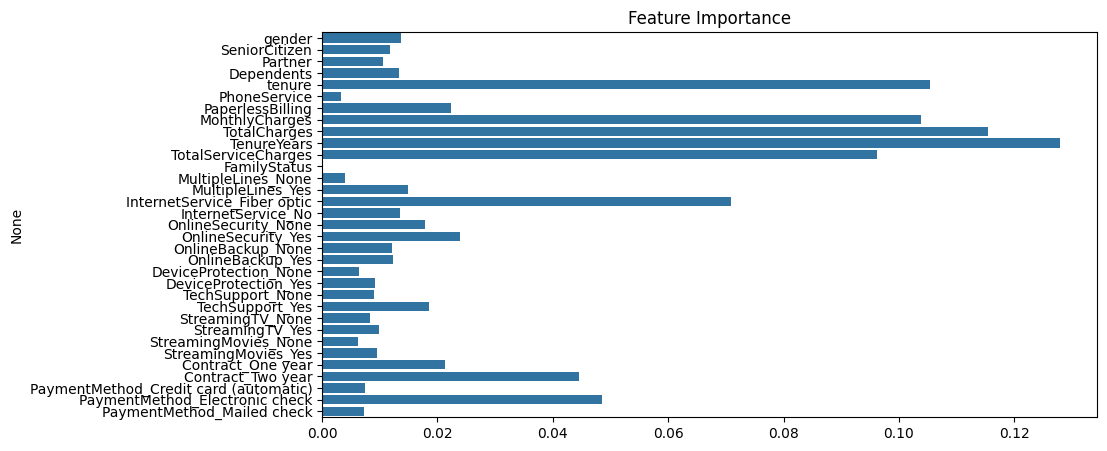

In [35]:
# Get feature importances from the best-performing tree-based model
best_tree_model = tuned_rf_model  # Change to tuned_xgb_model if XGBoost performs better
importances = best_tree_model.feature_importances_
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

##### Observation: Tenure, TotalCharges, and MonthlyCharges are the most influential features in predicting churn. Contract type and Internet service also play a key role, highlighting customer commitment and service quality as critical factors.

### 7. Model Selection 

<Figure size 1200x600 with 0 Axes>

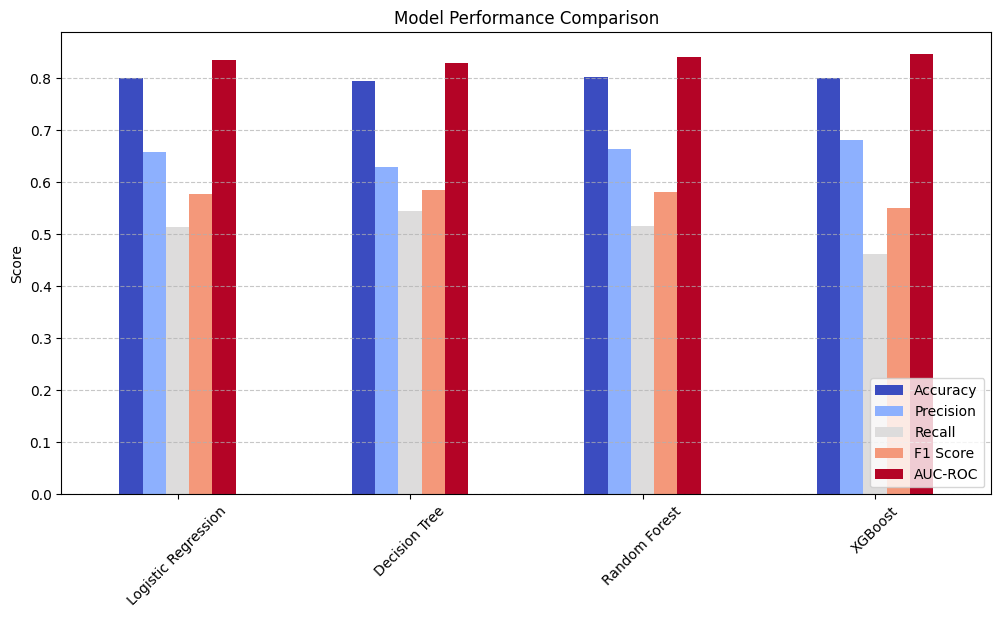

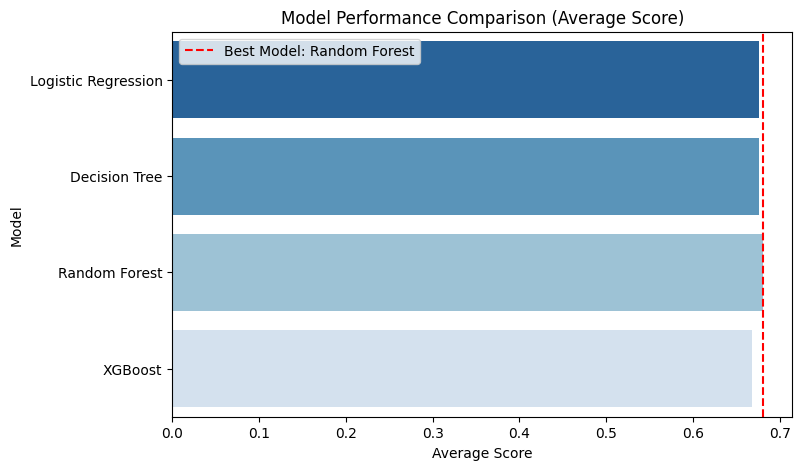

 Best Model Based on F1 Score: Decision Tree
 Best Overall Model (Balanced Performance): Random Forest


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


colors = ["lightblue", "lightblue", "lightblue", "lightblue"]
best_f1_model = results_df["F1 Score"].idxmax()
best_avg_model = results_df.mean(axis=1).idxmax()

# Computing average scores 
results_df["Average Score"] = results_df.mean(axis=1)

# Plot individual metric performances
plt.figure(figsize=(12, 6))
results_df.drop(columns=["Average Score"]).plot(kind="bar", figsize=(12, 6), colormap="coolwarm")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Plot the best model based on the "average of all metrics"
plt.figure(figsize=(8, 5))
sns.barplot(y=results_df.index, x=results_df["Average Score"], palette="Blues_r")
plt.axvline(x=results_df.loc[best_avg_model, "Average Score"], color="red", linestyle="--", label=f"Best Model: {best_avg_model}")
plt.title("Model Performance Comparison (Average Score)")
plt.xlabel("Average Score")
plt.ylabel("Model")
plt.legend()
plt.show()

print(f" Best Model Based on F1 Score: {best_f1_model}")
print(f" Best Overall Model (Balanced Performance): {best_avg_model}")
